## Background of the Study:


The following is a dataset of residential homes in Ames, Iowa which includes various elements that provide a comprehensive description of each residential property. In this study, we will see which elements or features in a residential home influences the sales price.

## Statement of Study Objectives: 

1- What is the relationship between lot area and sale price?<br>
2- What is the relationship between total basement area and sale price?<br>
3- What is the relationship between number of rooms and sale price?

## Data Source:


https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house = pd.read_csv("train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Variables:

In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are **81 variables** and **1,460 observations** in the dataset. In the interest of this study, we'll only be using the following variables:

* LotArea - Lot size in square feet (Numerical)
* TotalBsmtSF - Total square feet of basement area (Numerical)
* TotRmsAbvGrd - Total rooms above ground (Numerical)
* SalePrice - Property sale price in dollars (Numerical)

## Data Cleaning:

In [5]:
house_wf = house[['LotArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'SalePrice']]
house_wf

,LotArea,TotalBsmtSF,TotRmsAbvGrd,SalePrice
0,8450,856,8,208500
1,9600,1262,6,181500
2,11250,920,6,223500
3,9550,756,7,140000
4,14260,1145,9,250000
...,...,...,...,...
1455,7917,953,7,175000
1456,13175,1542,7,210000
1457,9042,1152,9,266500
1458,9717,1078,5,142125


In [7]:
house_wf.isna().sum()

LotArea         0
TotalBsmtSF     0
TotRmsAbvGrd    0
SalePrice       0
dtype: int64

There are no missing values so we can proceed with the analysis.

## Univariate Analysis:

In [23]:
house_wf.describe()

,LotArea,TotalBsmtSF,TotRmsAbvGrd,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1057.429452,6.517808,180921.195890
std,9981.264932,438.705324,1.625393,79442.502883
min,1300.000000,0.000000,2.000000,34900.000000
25%,7553.500000,795.750000,5.000000,129975.000000
50%,9478.500000,991.500000,6.000000,163000.000000
75%,11601.500000,1298.250000,7.000000,214000.000000
max,215245.000000,6110.000000,14.000000,755000.000000


#### Lot Area

<Axes: xlabel='LotArea', ylabel='Count'>

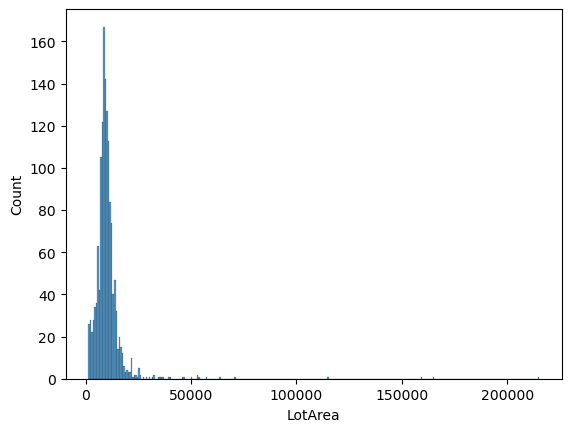

In [31]:
sns.histplot(house_wf['LotArea'])

In [32]:
house_wf['LotArea'].median()

9478.5

Graph is right-skewed which means average lot area of 10,516sq.ft is greater than the median of 9,478.5sq.ft. 

#### Total Basement Area

<Axes: xlabel='TotalBsmtSF', ylabel='Count'>

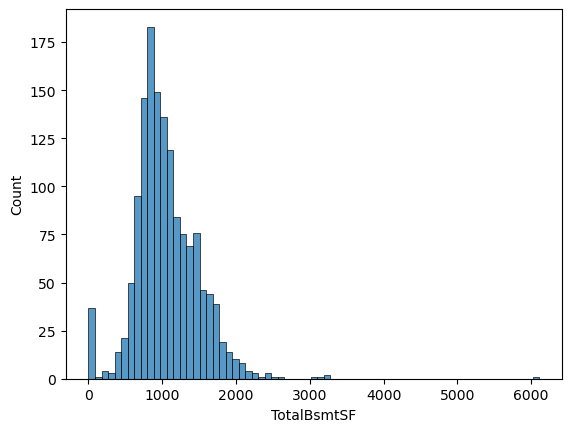

In [33]:
sns.histplot(house_wf['TotalBsmtSF'])

In [34]:
house_wf['TotalBsmtSF'].median()

991.5

Graph is right-skewed which means average basement area of 1,057.43sq.ft is greater than the median of 991.5sq.ft. 

#### Number of Rooms

<Axes: xlabel='TotRmsAbvGrd', ylabel='Count'>

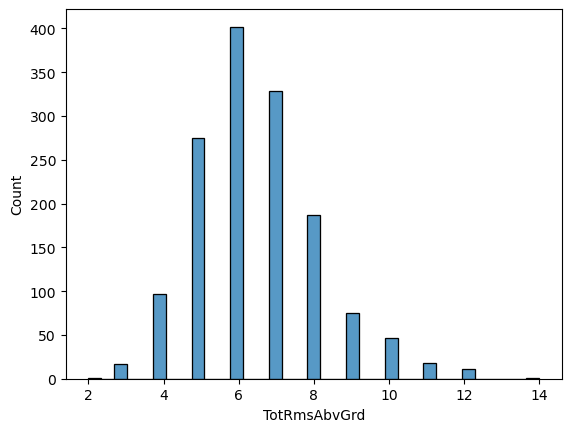

In [35]:
sns.histplot(house_wf['TotRmsAbvGrd'])

In [40]:
house_wf['TotRmsAbvGrd'].median()

6.0

Graph is right-skewed which means average number of rooms of 6.5 is greater than the median of 6. 

#### Sale Price

<Axes: xlabel='SalePrice', ylabel='Count'>

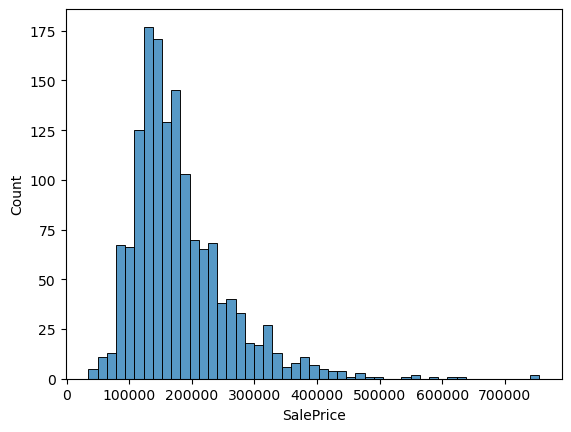

In [36]:
sns.histplot(house_wf['SalePrice'])

In [37]:
house_wf['SalePrice'].median()

163000.0

Graph is right-skewed which means average sale price of USD 180,921 is greater than the median of USD 163,000. 

## Bivariate Analysis:

In [21]:
house_wf.corr()

,LotArea,TotalBsmtSF,TotRmsAbvGrd,SalePrice
LotArea,1.000000,0.260833,0.190015,0.263843
TotalBsmtSF,0.260833,1.000000,0.285573,0.613581
TotRmsAbvGrd,0.190015,0.285573,1.000000,0.533723
SalePrice,0.263843,0.613581,0.533723,1.000000


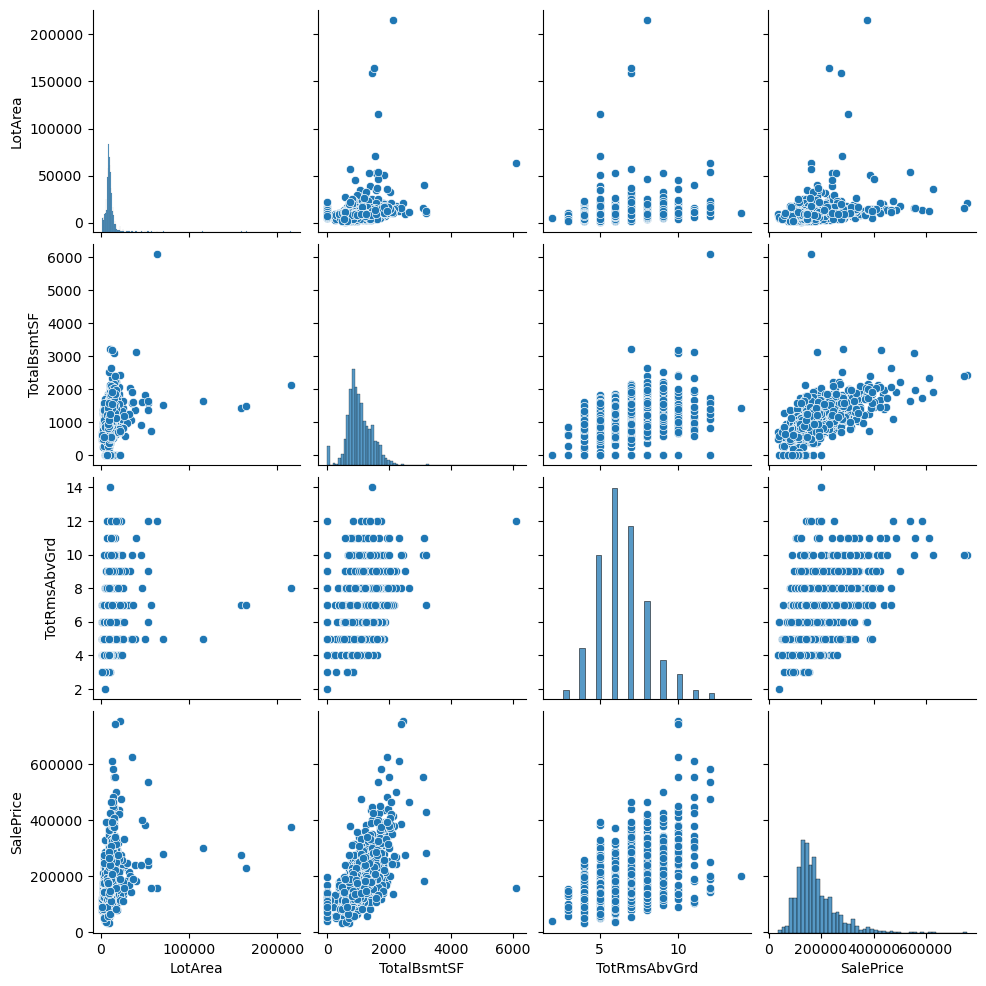

In [22]:
sns.pairplot(house_wf)

## Conclusion and Findings:

1- What is the relationship between lot area and sale price?<br>

**There is weak correlation between lot area and the sale price.**

2- What is the relationship between total basement area and sale price?<br>

**There is moderate positive correlation between total basement area and the sale price.**

3- What is the relationship between number of rooms and sale price?

**There is moderate positive correlation between number of rooms and the sale price.**